In [1]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.stats as stats
import astropy.units as u
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
from bisect import bisect_left
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 22})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [15, 10]
from IPython.display import Audio, display
def allDone():
    display(Audio(filename='beep.mp3', autoplay=True))
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
import lmfit

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
import emcee
import corner
import numdifftools
from scipy.ndimage import interpolation
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from multiprocessing import Pool
import pickle
import h5py
import scipy
from matplotlib.pyplot import GridSpec
import pandas as pd

In [2]:
def get_spectrum(source_id):
    path = wdtable[wdtable['source_id'] == source_id][0]['specpath']
    try:
        f = fits.open(path)
        flux = f[1].data['flux']
        loglam = f[1].data['loglam']
        f.close()
        lam = 10**loglam
    except:
        print('Spectrum file missing...')
        return
    return lam,flux

In [3]:
filetable = Table.read('filetable.fits')
wdtable = Table.read('tremblay_final.fits')
print(len(wdtable))
wdtable = join(filetable,wdtable,keys = ['source_id'])

DA = (wdtable['spectral_class_1'] == 'DA')
wdtable = wdtable[DA]
print(len(wdtable))

5396
5366


In [4]:
df = pd.read_csv('balmerparams.csv')

clean = (
    (df['center_a'] < halpha + 25)&
    (df['center_a'] > halpha - 25)&
    (df['center_b'] < hbeta + 25)&
    (df['center_b'] > hbeta - 25)&
    (df['center_g'] < hgamma + 25)&
    (df['center_g'] > hgamma - 25)&
    (df['fwhm_a'] < 100)&
    (df['fwhm_b'] < 100)&
    (df['fwhm_g'] < 100)
)
dfc = df[clean]

In [5]:
cleantable = Table.read('balmerparamstable.fits')

In [6]:
X = dfc.to_numpy()
t = np.asarray([cleantable['spec_Teff'], cleantable['spec_logg']]).T

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,t, test_size = 0.1)

In [8]:
len(X)

5130

In [9]:
from wdtools.neural import BaseNN

Using TensorFlow backend.


In [48]:
bnn = BaseNN(n_input = len(X[0]), n_output = 2, n_hidden = 2, neurons = 32, bayesian = True,\
             input_scale = 'balmer', output_scale = 'labels')

In [49]:
bnn.nn().summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 19)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                640       
_________________________________________________________________
MCDropout_5 (MCDropout)      (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
MCDropout_6 (MCDropout)      (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 1,762
Trainable params: 1,762
Non-trainable params: 0
_________________________________________________________

In [51]:
bnn.get_params()

(n_input=14, n_output=2, n_hidden=2, neurons=10, activation='relu', output_activation='linear', regularization=0, loss='mse', bayesian=False, dropout=0.1, input_bounds=[[0, 1]], output_bounds=[[0, 1]], input_scale=None, output_scale=None)


In [56]:
bnn.train(X, t, n_epochs = 5000, verbose = True)

Epoch 1/5000
5130/5130 [==============================] - 0s 15us/step - loss: 8.2783e-04
Epoch 2/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.0212e-04
Epoch 3/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.2773e-04
Epoch 4/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.0727e-04
Epoch 5/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2961e-04
Epoch 6/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9872e-04
Epoch 7/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3412e-04
Epoch 8/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1371e-04
Epoch 9/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8232e-04
Epoch 10/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9209e-04
Epoch 11/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3359e-04
Epoch 12

5130/5130 [==============================] - 0s 11us/step - loss: 8.1952e-04
Epoch 92/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9713e-04
Epoch 93/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9650e-04
Epoch 94/5000
5130/5130 [==============================] - 0s 12us/step - loss: 7.9845e-04
Epoch 95/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.2238e-04
Epoch 96/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8889e-04
Epoch 97/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8349e-04
Epoch 98/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1373e-04
Epoch 99/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.8286e-04
Epoch 100/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9252e-04
Epoch 101/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7258e-04
Epoch 102/5

5130/5130 [==============================] - 0s 11us/step - loss: 8.0874e-04
Epoch 181/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7614e-04
Epoch 182/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9262e-04
Epoch 183/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0245e-04
Epoch 184/5000
5130/5130 [==============================] - 0s 10us/step - loss: 8.1471e-04
Epoch 185/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7003e-04
Epoch 186/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3086e-04
Epoch 187/5000
5130/5130 [==============================] - 0s 13us/step - loss: 8.2114e-04
Epoch 188/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.2375e-04
Epoch 189/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.1455e-04
Epoch 190/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9331e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 7.9165e-04
Epoch 270/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.9287e-04
Epoch 271/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2720e-04
Epoch 272/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8098e-04
Epoch 273/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7960e-04
Epoch 274/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8852e-04
Epoch 275/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2170e-04
Epoch 276/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8280e-04
Epoch 277/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8835e-04
Epoch 278/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1634e-04
Epoch 279/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0029e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 8.0082e-04
Epoch 359/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0123e-04
Epoch 360/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2502e-04
Epoch 361/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3660e-04
Epoch 362/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8807e-04
Epoch 363/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9784e-04
Epoch 364/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9070e-04
Epoch 365/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0659e-04
Epoch 366/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0940e-04
Epoch 367/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1731e-04
Epoch 368/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1103e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 7.8062e-04
Epoch 448/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4130e-04
Epoch 449/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6355e-04
Epoch 450/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1871e-04
Epoch 451/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0653e-04
Epoch 452/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0069e-04
Epoch 453/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8033e-04
Epoch 454/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8875e-04
Epoch 455/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8124e-04
Epoch 456/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8174e-04
Epoch 457/5000
5130/5130 [==============================] - 0s 12us/step - loss: 7.8877e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 7.9428e-04
Epoch 537/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7911e-04
Epoch 538/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0556e-04
Epoch 539/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9883e-04
Epoch 540/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1624e-04
Epoch 541/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6737e-04
Epoch 542/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9658e-04
Epoch 543/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2596e-04
Epoch 544/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0727e-04
Epoch 545/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9775e-04
Epoch 546/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0485e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 8.0588e-04
Epoch 626/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0993e-04
Epoch 627/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9693e-04
Epoch 628/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8256e-04
Epoch 629/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9857e-04
Epoch 630/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7852e-04
Epoch 631/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7999e-04
Epoch 632/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3594e-04
Epoch 633/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1510e-04
Epoch 634/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8768e-04
Epoch 635/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8636e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 8.0097e-04
Epoch 715/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0052e-04
Epoch 716/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1446e-04
Epoch 717/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0116e-04
Epoch 718/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7800e-04
Epoch 719/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7500e-04
Epoch 720/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1646e-04
Epoch 721/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9643e-04
Epoch 722/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7601e-04
Epoch 723/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9031e-04
Epoch 724/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6994e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 8.0223e-04
Epoch 804/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9279e-04
Epoch 805/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8341e-04
Epoch 806/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2324e-04
Epoch 807/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1707e-04
Epoch 808/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0199e-04
Epoch 809/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7501e-04
Epoch 810/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8490e-04
Epoch 811/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9173e-04
Epoch 812/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9212e-04
Epoch 813/5000
5130/5130 [==============================] - 0s 12us/step - loss: 7.9729e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 7.8927e-04
Epoch 893/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7148e-04
Epoch 894/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8072e-04
Epoch 895/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8265e-04
Epoch 896/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8227e-04
Epoch 897/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7966e-04
Epoch 898/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1720e-04
Epoch 899/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9739e-04
Epoch 900/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.5059e-04
Epoch 901/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7674e-04
Epoch 902/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2933e-04
Epo

5130/5130 [==============================] - 0s 10us/step - loss: 8.1644e-04
Epoch 982/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8643e-04
Epoch 983/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2064e-04
Epoch 984/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9149e-04
Epoch 985/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1071e-04
Epoch 986/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.4517e-04
Epoch 987/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8244e-04
Epoch 988/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0495e-04
Epoch 989/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9551e-04
Epoch 990/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1449e-04
Epoch 991/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7541e-04
Epo

5130/5130 [==============================] - 0s 11us/step - loss: 8.1526e-04
Epoch 1070/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7538e-04
Epoch 1071/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9232e-04
Epoch 1072/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3594e-04
Epoch 1073/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7374e-04
Epoch 1074/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9762e-04
Epoch 1075/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8830e-04
Epoch 1076/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7760e-04
Epoch 1077/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9093e-04
Epoch 1078/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8544e-04
Epoch 1079/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.15

5130/5130 [==============================] - 0s 11us/step - loss: 7.8943e-04
Epoch 1158/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1426e-04
Epoch 1159/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0324e-04
Epoch 1160/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.4118e-04
Epoch 1161/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9320e-04
Epoch 1162/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7295e-04
Epoch 1163/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1367e-04
Epoch 1164/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9140e-04
Epoch 1165/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9225e-04
Epoch 1166/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9829e-04
Epoch 1167/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.02

5130/5130 [==============================] - 0s 11us/step - loss: 8.2876e-04
Epoch 1246/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9021e-04
Epoch 1247/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2083e-04
Epoch 1248/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7022e-04
Epoch 1249/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2549e-04
Epoch 1250/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7039e-04
Epoch 1251/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7896e-04
Epoch 1252/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6554e-04
Epoch 1253/5000
5130/5130 [==============================] - 0s 10us/step - loss: 8.1545e-04
Epoch 1254/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0671e-04
Epoch 1255/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.99

5130/5130 [==============================] - 0s 11us/step - loss: 8.0758e-04
Epoch 1334/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7316e-04
Epoch 1335/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1559e-04
Epoch 1336/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3926e-04
Epoch 1337/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9476e-04
Epoch 1338/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1531e-04
Epoch 1339/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8960e-04
Epoch 1340/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7025e-04
Epoch 1341/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9820e-04
Epoch 1342/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2092e-04
Epoch 1343/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.97

5130/5130 [==============================] - 0s 10us/step - loss: 7.9716e-04
Epoch 1422/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9389e-04
Epoch 1423/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0086e-04
Epoch 1424/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8538e-04
Epoch 1425/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1119e-04
Epoch 1426/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9004e-04
Epoch 1427/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1513e-04
Epoch 1428/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0220e-04
Epoch 1429/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1309e-04
Epoch 1430/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7561e-04
Epoch 1431/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.10

5130/5130 [==============================] - 0s 11us/step - loss: 7.8941e-04
Epoch 1510/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8145e-04
Epoch 1511/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8296e-04
Epoch 1512/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9110e-04
Epoch 1513/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8085e-04
Epoch 1514/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9882e-04
Epoch 1515/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5064e-04
Epoch 1516/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9174e-04
Epoch 1517/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8478e-04
Epoch 1518/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9990e-04
Epoch 1519/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.85

5130/5130 [==============================] - 0s 11us/step - loss: 7.9653e-04
Epoch 1598/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1267e-04
Epoch 1599/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0364e-04
Epoch 1600/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5847e-04
Epoch 1601/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3338e-04
Epoch 1602/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1742e-04
Epoch 1603/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0758e-04
Epoch 1604/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2135e-04
Epoch 1605/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8239e-04
Epoch 1606/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9381e-04
Epoch 1607/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.10

5130/5130 [==============================] - 0s 11us/step - loss: 8.1325e-04
Epoch 1686/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9224e-04
Epoch 1687/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9671e-04
Epoch 1688/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2566e-04
Epoch 1689/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9403e-04
Epoch 1690/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1320e-04
Epoch 1691/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.4747e-04
Epoch 1692/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8644e-04
Epoch 1693/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8102e-04
Epoch 1694/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6803e-04
Epoch 1695/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.90

5130/5130 [==============================] - 0s 11us/step - loss: 7.8748e-04
Epoch 1774/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9345e-04
Epoch 1775/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8461e-04
Epoch 1776/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0565e-04
Epoch 1777/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9362e-04
Epoch 1778/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2346e-04
Epoch 1779/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7959e-04
Epoch 1780/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4872e-04
Epoch 1781/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1507e-04
Epoch 1782/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8418e-04
Epoch 1783/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.59

5130/5130 [==============================] - 0s 11us/step - loss: 7.6737e-04
Epoch 1862/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9301e-04
Epoch 1863/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8444e-04
Epoch 1864/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7233e-04
Epoch 1865/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8688e-04
Epoch 1866/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7152e-04
Epoch 1867/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0193e-04
Epoch 1868/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6727e-04
Epoch 1869/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9150e-04
Epoch 1870/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0794e-04
Epoch 1871/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.28

5130/5130 [==============================] - 0s 11us/step - loss: 7.9965e-04
Epoch 1950/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0248e-04
Epoch 1951/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7339e-04
Epoch 1952/5000
5130/5130 [==============================] - 0s 10us/step - loss: 8.1029e-04
Epoch 1953/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1313e-04
Epoch 1954/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8235e-04
Epoch 1955/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9595e-04
Epoch 1956/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8868e-04
Epoch 1957/5000
5130/5130 [==============================] - 0s 15us/step - loss: 7.9264e-04
Epoch 1958/5000
5130/5130 [==============================] - 0s 14us/step - loss: 8.0206e-04
Epoch 1959/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.82

5130/5130 [==============================] - 0s 11us/step - loss: 7.6789e-04
Epoch 2038/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9102e-04
Epoch 2039/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0081e-04
Epoch 2040/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7495e-04
Epoch 2041/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.7923e-04
Epoch 2042/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6645e-04
Epoch 2043/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0232e-04
Epoch 2044/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6902e-04
Epoch 2045/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0568e-04
Epoch 2046/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9101e-04
Epoch 2047/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.27

5130/5130 [==============================] - 0s 11us/step - loss: 7.8919e-04
Epoch 2126/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9744e-04
Epoch 2127/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0198e-04
Epoch 2128/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5623e-04
Epoch 2129/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8586e-04
Epoch 2130/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9187e-04
Epoch 2131/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8515e-04
Epoch 2132/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6928e-04
Epoch 2133/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5578e-04
Epoch 2134/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7104e-04
Epoch 2135/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.99

5130/5130 [==============================] - 0s 11us/step - loss: 7.8510e-04
Epoch 2214/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9041e-04
Epoch 2215/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2159e-04
Epoch 2216/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9191e-04
Epoch 2217/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0627e-04
Epoch 2218/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9160e-04
Epoch 2219/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0312e-04
Epoch 2220/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7431e-04
Epoch 2221/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0771e-04
Epoch 2222/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0003e-04
Epoch 2223/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.23

5130/5130 [==============================] - 0s 11us/step - loss: 7.8889e-04
Epoch 2302/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7098e-04
Epoch 2303/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.3526e-04
Epoch 2304/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9727e-04
Epoch 2305/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7134e-04
Epoch 2306/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7885e-04
Epoch 2307/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6643e-04
Epoch 2308/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6173e-04
Epoch 2309/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1359e-04
Epoch 2310/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8772e-04
Epoch 2311/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.00

5130/5130 [==============================] - 0s 11us/step - loss: 8.0512e-04
Epoch 2390/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7449e-04
Epoch 2391/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9193e-04
Epoch 2392/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7456e-04
Epoch 2393/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1380e-04
Epoch 2394/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8305e-04
Epoch 2395/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8081e-04
Epoch 2396/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7951e-04
Epoch 2397/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3109e-04
Epoch 2398/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.5184e-04
Epoch 2399/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.95

5130/5130 [==============================] - 0s 11us/step - loss: 7.8049e-04
Epoch 2478/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9138e-04
Epoch 2479/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5506e-04
Epoch 2480/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8575e-04
Epoch 2481/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8040e-04
Epoch 2482/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2257e-04
Epoch 2483/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1909e-04
Epoch 2484/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1530e-04
Epoch 2485/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6251e-04
Epoch 2486/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8287e-04
Epoch 2487/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.79

5130/5130 [==============================] - 0s 11us/step - loss: 7.9694e-04
Epoch 2566/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6806e-04
Epoch 2567/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1824e-04
Epoch 2568/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8354e-04
Epoch 2569/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0806e-04
Epoch 2570/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9956e-04
Epoch 2571/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8968e-04
Epoch 2572/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1780e-04
Epoch 2573/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.5941e-04
Epoch 2574/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1099e-04
Epoch 2575/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.18

5130/5130 [==============================] - 0s 11us/step - loss: 7.7147e-04
Epoch 2654/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6872e-04
Epoch 2655/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0797e-04
Epoch 2656/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9750e-04
Epoch 2657/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9315e-04
Epoch 2658/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0150e-04
Epoch 2659/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0195e-04
Epoch 2660/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1740e-04
Epoch 2661/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8039e-04
Epoch 2662/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.9871e-04
Epoch 2663/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.84

5130/5130 [==============================] - 0s 11us/step - loss: 7.5724e-04
Epoch 2742/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5508e-04
Epoch 2743/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8159e-04
Epoch 2744/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0761e-04
Epoch 2745/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0603e-04
Epoch 2746/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6301e-04
Epoch 2747/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6383e-04
Epoch 2748/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.5368e-04
Epoch 2749/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2062e-04
Epoch 2750/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.6798e-04
Epoch 2751/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.68

5130/5130 [==============================] - 0s 11us/step - loss: 7.7011e-04
Epoch 2830/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9308e-04
Epoch 2831/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6971e-04
Epoch 2832/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7311e-04
Epoch 2833/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2923e-04
Epoch 2834/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7195e-04
Epoch 2835/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8564e-04
Epoch 2836/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8980e-04
Epoch 2837/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7823e-04
Epoch 2838/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9574e-04
Epoch 2839/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.06

5130/5130 [==============================] - 0s 11us/step - loss: 7.7837e-04
Epoch 2918/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8065e-04
Epoch 2919/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5645e-04
Epoch 2920/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6915e-04
Epoch 2921/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5030e-04
Epoch 2922/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9099e-04
Epoch 2923/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9860e-04
Epoch 2924/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3854e-04
Epoch 2925/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6554e-04
Epoch 2926/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9336e-04
Epoch 2927/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.86

5130/5130 [==============================] - 0s 11us/step - loss: 7.9496e-04
Epoch 3006/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9253e-04
Epoch 3007/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2877e-04
Epoch 3008/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9299e-04
Epoch 3009/5000
5130/5130 [==============================] - 0s 10us/step - loss: 8.1768e-04
Epoch 3010/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8684e-04
Epoch 3011/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4982e-04
Epoch 3012/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6024e-04
Epoch 3013/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8298e-04
Epoch 3014/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9852e-04
Epoch 3015/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.83

5130/5130 [==============================] - 0s 11us/step - loss: 7.6349e-04
Epoch 3094/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6557e-04
Epoch 3095/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5744e-04
Epoch 3096/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9617e-04
Epoch 3097/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2643e-04
Epoch 3098/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1135e-04
Epoch 3099/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8753e-04
Epoch 3100/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8712e-04
Epoch 3101/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8369e-04
Epoch 3102/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5200e-04
Epoch 3103/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.75

5130/5130 [==============================] - 0s 11us/step - loss: 8.1381e-04
Epoch 3182/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0189e-04
Epoch 3183/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9698e-04
Epoch 3184/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8374e-04
Epoch 3185/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8199e-04
Epoch 3186/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6677e-04
Epoch 3187/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4599e-04
Epoch 3188/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7608e-04
Epoch 3189/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0757e-04
Epoch 3190/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7672e-04
Epoch 3191/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.77

5130/5130 [==============================] - 0s 11us/step - loss: 7.6307e-04
Epoch 3270/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8956e-04
Epoch 3271/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6846e-04
Epoch 3272/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6721e-04
Epoch 3273/5000
5130/5130 [==============================] - 0s 10us/step - loss: 8.0004e-04
Epoch 3274/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6455e-04
Epoch 3275/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6565e-04
Epoch 3276/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9085e-04
Epoch 3277/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8146e-04
Epoch 3278/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4235e-04
Epoch 3279/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.82

5130/5130 [==============================] - 0s 11us/step - loss: 7.9618e-04
Epoch 3358/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7130e-04
Epoch 3359/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6124e-04
Epoch 3360/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8991e-04
Epoch 3361/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8307e-04
Epoch 3362/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9129e-04
Epoch 3363/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7512e-04
Epoch 3364/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0720e-04
Epoch 3365/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7059e-04
Epoch 3366/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7773e-04
Epoch 3367/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.64

5130/5130 [==============================] - 0s 11us/step - loss: 8.0030e-04
Epoch 3446/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8577e-04
Epoch 3447/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9727e-04
Epoch 3448/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8047e-04
Epoch 3449/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7401e-04
Epoch 3450/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5984e-04
Epoch 3451/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7575e-04
Epoch 3452/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.5206e-04
Epoch 3453/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.9807e-04
Epoch 3454/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0185e-04
Epoch 3455/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.71

5130/5130 [==============================] - 0s 11us/step - loss: 8.0458e-04
Epoch 3534/5000
5130/5130 [==============================] - 0s 13us/step - loss: 7.7681e-04
Epoch 3535/5000
5130/5130 [==============================] - 0s 12us/step - loss: 8.0154e-04
Epoch 3536/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6616e-04
Epoch 3537/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1990e-04
Epoch 3538/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7486e-04
Epoch 3539/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6479e-04
Epoch 3540/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9203e-04
Epoch 3541/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6814e-04
Epoch 3542/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8040e-04
Epoch 3543/5000
5130/5130 [==============================] - 0s 12us/step - loss: 7.69

5130/5130 [==============================] - 0s 11us/step - loss: 7.8992e-04
Epoch 3622/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1677e-04
Epoch 3623/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9514e-04
Epoch 3624/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4873e-04
Epoch 3625/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7262e-04
Epoch 3626/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9570e-04
Epoch 3627/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7259e-04
Epoch 3628/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8800e-04
Epoch 3629/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6498e-04
Epoch 3630/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9950e-04
Epoch 3631/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.69

5130/5130 [==============================] - 0s 13us/step - loss: 7.8536e-04
Epoch 3710/5000
5130/5130 [==============================] - 0s 13us/step - loss: 7.9020e-04
Epoch 3711/5000
5130/5130 [==============================] - 0s 12us/step - loss: 7.8945e-04
Epoch 3712/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0336e-04
Epoch 3713/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9636e-04
Epoch 3714/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5915e-04
Epoch 3715/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7722e-04
Epoch 3716/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8272e-04
Epoch 3717/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6320e-04
Epoch 3718/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9121e-04
Epoch 3719/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.04

5130/5130 [==============================] - 0s 11us/step - loss: 7.6715e-04
Epoch 3798/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7671e-04
Epoch 3799/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8461e-04
Epoch 3800/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9272e-04
Epoch 3801/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6729e-04
Epoch 3802/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8890e-04
Epoch 3803/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9433e-04
Epoch 3804/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9913e-04
Epoch 3805/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5530e-04
Epoch 3806/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.5121e-04
Epoch 3807/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.66

5130/5130 [==============================] - 0s 11us/step - loss: 8.2257e-04
Epoch 3886/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8797e-04
Epoch 3887/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7283e-04
Epoch 3888/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6805e-04
Epoch 3889/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3018e-04
Epoch 3890/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9408e-04
Epoch 3891/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4652e-04
Epoch 3892/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7396e-04
Epoch 3893/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9685e-04
Epoch 3894/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8982e-04
Epoch 3895/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.15

5130/5130 [==============================] - 0s 10us/step - loss: 7.7059e-04
Epoch 3974/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7728e-04
Epoch 3975/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5395e-04
Epoch 3976/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6947e-04
Epoch 3977/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0138e-04
Epoch 3978/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6632e-04
Epoch 3979/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8337e-04
Epoch 3980/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1227e-04
Epoch 3981/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8107e-04
Epoch 3982/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7811e-04
Epoch 3983/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.04

5130/5130 [==============================] - 0s 11us/step - loss: 7.9100e-04
Epoch 4062/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3888e-04
Epoch 4063/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9424e-04
Epoch 4064/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7683e-04
Epoch 4065/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9779e-04
Epoch 4066/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7577e-04
Epoch 4067/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7103e-04
Epoch 4068/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7596e-04
Epoch 4069/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4395e-04
Epoch 4070/5000
5130/5130 [==============================] - 0s 16us/step - loss: 7.7684e-04
Epoch 4071/5000
5130/5130 [==============================] - 0s 14us/step - loss: 7.79

5130/5130 [==============================] - 0s 10us/step - loss: 7.5679e-04
Epoch 4150/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6518e-04
Epoch 4151/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6280e-04
Epoch 4152/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1280e-04
Epoch 4153/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0929e-04
Epoch 4154/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0745e-04
Epoch 4155/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0442e-04
Epoch 4156/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9058e-04
Epoch 4157/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6057e-04
Epoch 4158/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0338e-04
Epoch 4159/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.67

5130/5130 [==============================] - 0s 11us/step - loss: 7.9174e-04
Epoch 4238/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7490e-04
Epoch 4239/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8882e-04
Epoch 4240/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7978e-04
Epoch 4241/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7266e-04
Epoch 4242/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8107e-04
Epoch 4243/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0723e-04
Epoch 4244/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.2625e-04
Epoch 4245/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0808e-04
Epoch 4246/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0536e-04
Epoch 4247/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.46

5130/5130 [==============================] - 0s 11us/step - loss: 8.0183e-04
Epoch 4326/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9656e-04
Epoch 4327/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7482e-04
Epoch 4328/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5763e-04
Epoch 4329/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7007e-04
Epoch 4330/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.4992e-04
Epoch 4331/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9317e-04
Epoch 4332/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9966e-04
Epoch 4333/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7819e-04
Epoch 4334/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8369e-04
Epoch 4335/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.04

5130/5130 [==============================] - 0s 11us/step - loss: 7.8028e-04
Epoch 4414/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9042e-04
Epoch 4415/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7177e-04
Epoch 4416/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7647e-04
Epoch 4417/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0400e-04
Epoch 4418/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9389e-04
Epoch 4419/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7989e-04
Epoch 4420/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8442e-04
Epoch 4421/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8897e-04
Epoch 4422/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9407e-04
Epoch 4423/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.84

5130/5130 [==============================] - 0s 11us/step - loss: 7.5090e-04
Epoch 4502/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8653e-04
Epoch 4503/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7564e-04
Epoch 4504/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8213e-04
Epoch 4505/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9780e-04
Epoch 4506/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6145e-04
Epoch 4507/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3077e-04
Epoch 4508/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6322e-04
Epoch 4509/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6359e-04
Epoch 4510/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6619e-04
Epoch 4511/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.75

5130/5130 [==============================] - 0s 11us/step - loss: 7.7859e-04
Epoch 4590/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8054e-04
Epoch 4591/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7676e-04
Epoch 4592/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8500e-04
Epoch 4593/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0042e-04
Epoch 4594/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8840e-04
Epoch 4595/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0646e-04
Epoch 4596/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8605e-04
Epoch 4597/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8559e-04
Epoch 4598/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8627e-04
Epoch 4599/5000
5130/5130 [==============================] - 0s 10us/step - loss: 7.58

5130/5130 [==============================] - 0s 10us/step - loss: 7.8906e-04
Epoch 4678/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8192e-04
Epoch 4679/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8316e-04
Epoch 4680/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8147e-04
Epoch 4681/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9429e-04
Epoch 4682/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.4411e-04
Epoch 4683/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8766e-04
Epoch 4684/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.3629e-04
Epoch 4685/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0212e-04
Epoch 4686/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.2802e-04
Epoch 4687/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.57

5130/5130 [==============================] - 0s 11us/step - loss: 7.6909e-04
Epoch 4766/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1170e-04
Epoch 4767/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1151e-04
Epoch 4768/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6610e-04
Epoch 4769/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5255e-04
Epoch 4770/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.5291e-04
Epoch 4771/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8594e-04
Epoch 4772/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8494e-04
Epoch 4773/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7067e-04
Epoch 4774/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7357e-04
Epoch 4775/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.07

5130/5130 [==============================] - 0s 11us/step - loss: 7.4886e-04
Epoch 4854/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6034e-04
Epoch 4855/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8852e-04
Epoch 4856/5000
5130/5130 [==============================] - 0s 12us/step - loss: 7.8881e-04
Epoch 4857/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6255e-04
Epoch 4858/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7848e-04
Epoch 4859/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0436e-04
Epoch 4860/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.0650e-04
Epoch 4861/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8269e-04
Epoch 4862/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8780e-04
Epoch 4863/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.69

5130/5130 [==============================] - 0s 11us/step - loss: 7.9076e-04
Epoch 4942/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6780e-04
Epoch 4943/5000
5130/5130 [==============================] - 0s 11us/step - loss: 8.1921e-04
Epoch 4944/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8380e-04
Epoch 4945/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.8834e-04
Epoch 4946/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9553e-04
Epoch 4947/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.6348e-04
Epoch 4948/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.9176e-04
Epoch 4949/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7971e-04
Epoch 4950/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.7233e-04
Epoch 4951/5000
5130/5130 [==============================] - 0s 11us/step - loss: 7.80

In [61]:
preds = bnn.eval(X_test)

(513, 2)
(513, 4)


In [64]:
bnn.model.save_weights('wdtools/models/parametric32.h5')

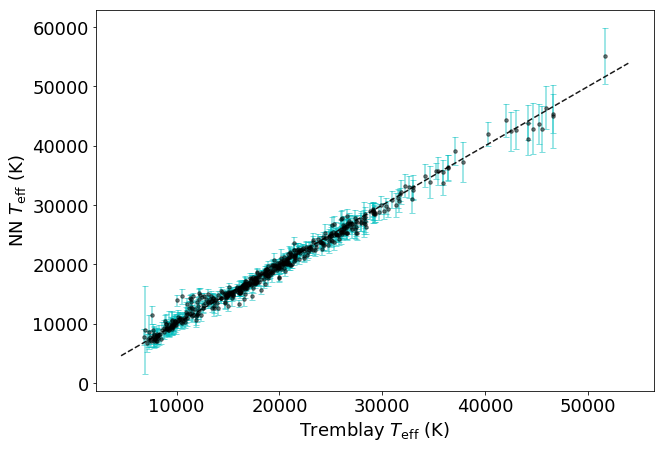

In [58]:
plt.figure(figsize = (10,7))
f = plt.subplot(111)
plt.errorbar(y_test[:,0], preds[:,0], yerr = preds[:,1], color='k',alpha = 0.5,\
            linestyle = 'None', marker = '.',\
            ecolor = 'c', capsize = 3, markersize = 7)
x = np.linspace(f.axes.get_xlim()[0],f.axes.get_xlim()[1],1000)
plt.plot(x,x,'k--', alpha = 0.9)
plt.xlabel('Tremblay $T_{\mathrm{eff}}$ (K)')
plt.ylabel('NN $T_{\mathrm{eff}}$ (K)');

Text(0, 0.5, 'NN $\\log{g}$ (dex)')

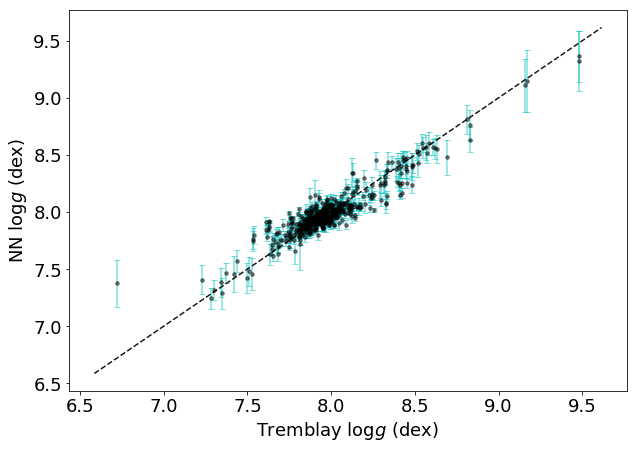

In [59]:
plt.figure(figsize = (10,7))
f = plt.subplot(111)
plt.errorbar(y_test[:,1], preds[:,2], yerr = preds[:,3], color='k',alpha = 0.5,\
            linestyle = 'None', marker = '.',\
            ecolor = 'c', capsize = 3, markersize = 7)
x = np.linspace(f.axes.get_xlim()[0],f.axes.get_xlim()[1],1000)
plt.plot(x,x,'k--', alpha = 0.9)
plt.xlabel('Tremblay $\log{g}$ (dex)')
plt.ylabel('NN $\log{g}$ (dex)')

In [21]:
np.array([np.min(X,0),np.max(X,0)]).T

array([[0.00000000e+00, 5.36200000e+03],
       [4.89297491e-10, 2.15776372e+01],
       [6.55784433e+03, 6.57034846e+03],
       [4.39400710e+00, 6.96432697e+01],
       [2.09438209e-03, 4.98649086e+01],
       [8.20121332e+00, 9.97301468e+01],
       [1.03210444e-01, 5.33331626e-01],
       [1.05808806e-08, 2.38123114e+01],
       [4.85934060e+03, 4.86780698e+03],
       [4.65600272e+00, 7.85555165e+01],
       [1.58654118e-03, 4.91400753e+01],
       [6.63800862e+00, 9.82804576e+01],
       [1.39077349e-01, 5.87369186e-01],
       [1.41997680e-07, 3.41095035e+01],
       [4.33767599e+03, 4.34652748e+03],
       [3.66673017e+00, 4.88370810e+01],
       [3.28315740e-04, 2.69317816e+01],
       [6.11958791e+00, 8.07541532e+01],
       [7.43264533e-02, 6.14472692e-01]])